# Попадает ли точка в фигуру?

Потребуются `pip install tensorflow keras`

In [1]:
import os
import numpy as np
import math
from tensorflow.keras import models, layers

`XY` — 1000000 случайных точек, `Z` — попадает точка в фигуру (1) или нет (0)

In [2]:
  XY = np.random.random((1_000_000, 2)).astype(np.float32) * 4.0 - 2.0

  Z = np.array([
    1 if (x**2 + y**2)**2 <= 2*(x**2 - y**2) else 0
    for [x, y] in XY
  ], dtype=np.float32)

In [3]:
model = models.Sequential([
    layers.InputLayer(input_shape=(2,)),
    layers.Dense(100, activation='sigmoid', use_bias=True),
    layers.Dense(20, activation='sigmoid', use_bias=True),
    layers.Dense(1, activation='sigmoid', use_bias=False)
])

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics='accuracy'
)

In [4]:
print("Training the duckling...")
model.fit(
      XY, Z,
      epochs=100,
     batch_size=1000,
     use_multiprocessing=True,
      verbose=False
)
model.save("smart_duckling_colab.h5")
print("Done,", model.evaluate(XY, Z))

Training the duckling...
31250/31250 [==============================] - 23s 740us/step - loss: 0.0021 - accuracy: 0.9982
Done, [0.0020545136649161577, 0.9982450008392334]


Ну и теперь посмотрим, как оно научилось ограничивать фигуру, но уже на 2500 точках...

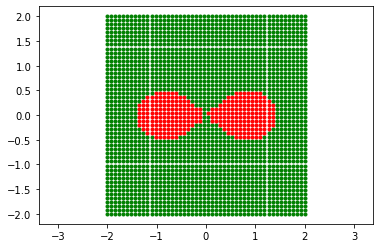

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.axis('equal')

c = np.linspace(-2,2,50)

# https://stackoverflow.com/a/11144716/539470 =)
XY = np.transpose([np.tile(c, len(c)), np.repeat(c, len(c))])

Z = model.predict(XY)

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, c='red' if z[0] >= 0.5 else 'green', marker='.')

plt.show()

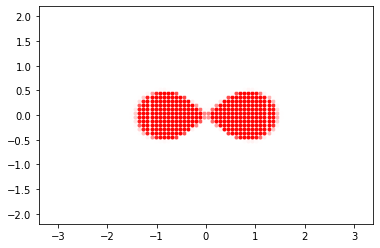

In [6]:
def saturate(v):
    return min(1, max(0, v))

plt.axis('equal')

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, color=[(1, 1-saturate(z[0]), 1-saturate(z[0]))], marker='.')

plt.show()